# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch


### Necessary Imports

In [ ]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [ ]:
import os
from google.colab import drive

### Download The Dataset & Define The Transforms

In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Exploring The Data

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)  # images [64, 1, 28, 28]，64 张，1 通道，28 宽，28 高 的图片  # labels [64] 64个标签
  # 28*28 = 784 个像素点，每张图片作为输入是[768] 的一维数组，每一批总共输入64 张，既是：[64, 784]
  # so, 输入层共784 个神经元结点，每个结点得到图片的其中一个像素作为输入
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
! rm -rf ./out && mkdir out

In [ ]:
! tar -zcvf MNIST.tar.gz out

out/
out/2_6_7.jpg
out/4_27_49.jpg
out/1_12_44.jpg
out/6_26_35.jpg
out/1_14_42.jpg
out/3_19_60.jpg
out/8_9_46.jpg
out/5_23_41.jpg
out/1_18_62.jpg
out/2_18_39.jpg
out/1_26_17.jpg
out/4_14_41.jpg
out/1_20_62.jpg
out/2_18_23.jpg
out/5_16_52.jpg
out/8_7_10.jpg
out/4_23_29.jpg
out/4_24_6.jpg
out/7_12_22.jpg
out/4_22_18.jpg
out/4_0_23.jpg
out/3_9_26.jpg
out/4_16_12.jpg
out/7_0_31.jpg
out/5_19_13.jpg
out/7_9_5.jpg
out/9_11_48.jpg
out/3_20_33.jpg
out/0_21_15.jpg
out/8_8_9.jpg
out/8_16_11.jpg
out/1_18_34.jpg
out/5_18_29.jpg
out/7_26_16.jpg
out/7_2_54.jpg
out/5_22_55.jpg
out/3_11_18.jpg
out/9_29_21.jpg
out/9_7_44.jpg
out/5_17_63.jpg
out/5_22_10.jpg
out/5_22_40.jpg
out/3_16_43.jpg
out/1_25_54.jpg
out/4_14_15.jpg
out/4_15_10.jpg
out/0_14_1.jpg
out/2_20_60.jpg
out/3_15_20.jpg
out/6_17_34.jpg
out/5_21_27.jpg
out/7_1_20.jpg
out/8_23_61.jpg
out/0_3_25.jpg
out/5_26_7.jpg
out/1_12_31.jpg
out/7_5_20.jpg
out/2_10_18.jpg
out/8_11_52.jpg
out/0_18_48.jpg
out/0_8_12.jpg
out/7_29_10.jpg
out/2_11_11.jpg
out/7_9

In [ ]:
import cv2

print( images.shape[0] )

for j in range(30):
  
  images, labels = next(dataiter)

  for i in range(images.shape[0]):
    a = ((images[i].numpy().squeeze() + 1) / 2) * 255
    b = np.rint(a)
    #plt.imshow(b, cmap='gray_r')
    #b
    label = labels.numpy()[i]
    #print(label)
    #cv2.imshow('Binary Threshold', b)
    cv2.imwrite(f'./out/{label}_{j}_{i}.jpg',b)
  



64


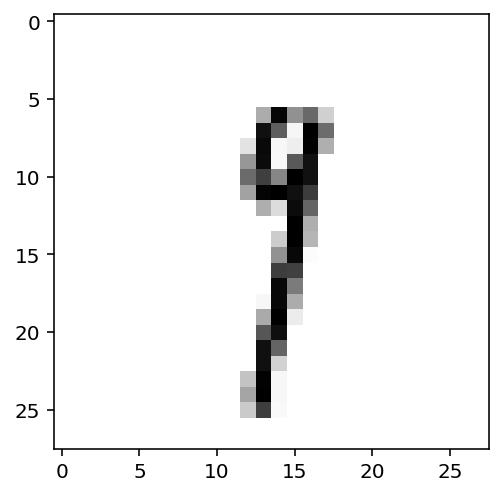

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  # squeeze 将 [1, 28, 28] 降维成 [28, 28]

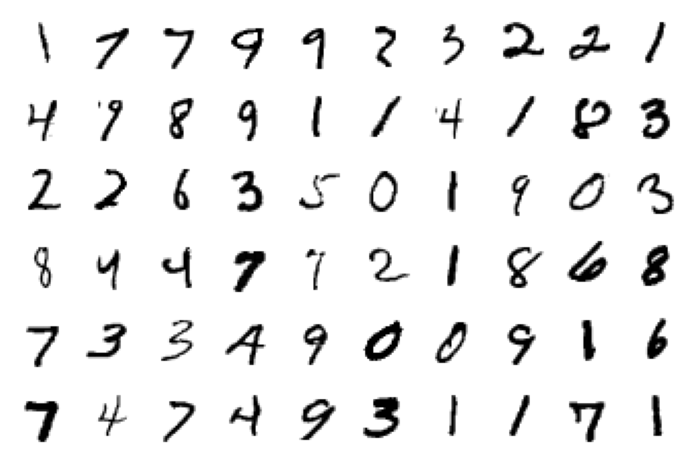

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)  # 绘制  6 行，10 列 个对象
    plt.axis('off')            # 关闭坐标轴显示
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [ ]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)  # 元素的总数不变，对维度重新进行解释，相当于 reshape  # 64 行，列数自适应(-1 的作用)  
  # 28*28 = 784 个像素点，每张图片作为输入是[784] 的一维数组，每一批总共输入64 张，既是：[64, 784]

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

### Core Training Of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))